# Disease Modeling

One of the most widely studied topics in network theory is the spread of infectious disease.

## Standard Models

There are two common models of disease:

- SIR disease:  
  - **S**usceptible individuals who have contact with infected individuals may become infected. 
  - **I**nfected individuals may transmit to their neighbors/partners and later recover.
  - **R**ecovered individuals are immune to reinfection.
  
- SIS disease:
  - **S**usceptible individuals who have contact with infected individuals may become infected. 
  - **I**nfected individuals may transmit to their neighbors/partners and later recover.  However they return to the susceptible class after recovery.
  
  
![image](SIS_SIR_basic.png)


An SIR disease spreading in a closed population (no births/deaths or immigration/emigration) is guaranteed to die out in a "reasonable" period of time.  An SIS disease may persist for exponentially long periods of time.

Many researchers have used mathematical modeling to provide guidance to policy decisions.  "Recently" (i.e., the last 20 years) new insights have come from network-based models and through large-scale "agent-based" computer simulations.

For this part of the course it may be worth looking at the book "Mathematics of Epidemics on Networks".  The figure above is Fig 1.11 of the book.


## SIR Disease

A good example of an SIR disease is Measles.  Almost everyone who has had measles (or 2 vaccinations) gains lifelong immunity.

There are two basic models of an SIR disease on a network.

- **Discrete time** model:  
  - **Duration**: In the discrete time version of the SIR model, each infected individual is infectious for a single time step.  
  - **Transmission Process**: During that time step, the indivdiual transmits with probability $p$ to each neighbor.
  
- **Continuous time** model:
  - **Duration**: In the continuous time version, each infected individual recovers with rate $\gamma$.  In other words, in a very short time interval of length $\Delta t$, if there are $M$ infected individuals, we would expect a randomly chosen set of size about $M \gamma \Delta t$ of them to recover.  Equivalently, the duration of infection is exponentially distributed with rate $\gamma$.
  - **Transmission Process**: During the infectious period, individuals transmit (independently) to their neighbors with rate $\tau$ (many people use $\beta$ instead).
  - **Transmission Probability**: The probability of transmitting to a given neighbor before recovering is $\tau/(\tau + \gamma)$.

### Simulating SIR disease with EoN

We're going to simulate SIR disease spread on networks using the Python package EoN.  This should be installed on all of the room's computers, and hopefully it's on your personal machines.  If you have any trouble installing, please let me know.

The documentation for EoN is available at [https://epidemicsonnetworks.readthedocs.io/en/latest/](https://epidemicsonnetworks.readthedocs.io/en/latest/).  A friend pointed out to me that this reads better as Epidemic Sonnet Works.

Let's start with the basic discrete-time version, for which EoN has `basic_discrete_SIR`.  Here is [the documentation](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.basic_discrete_SIR.html#EoN.basic_discrete_SIR).



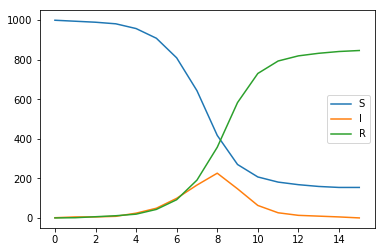

In [12]:
#You may need to run this more than once before something interesting
#happens.  By default a single individual is randomly infected.  That
#individual may recover before transmitting, in which case the output
#is a bit boring.

import EoN
import networkx as nx
import matplotlib.pyplot as plt

N = 1000
G = nx.fast_gnp_random_graph(N, 3/(N-1))

p=0.75

t, S, I, R = EoN.basic_discrete_SIR(G, p)

plt.plot(t, S, label= 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R, label = 'R')
plt.legend()
plt.show()

What do we learn from this example?

Depending on your luck, you may have learned that sometimes nothing interesting happens.

You can also see that the number of infections initially grows while the number susceptible drops.  At some point the number of infections starts to drop as well.

**Questions to ponder**
- What is it that triggers the drop in $I$?
- Why is it that not all people get infected?
- How often does an outbreak die out without getting large?


Now let's try the continuous time version.  EoN provides several ways to implement this.  We'll use `EoN.fast_SIR`, (though the `Gillespie` version turns out to be of comparable speed).  Here is [the documentation](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.fast_SIR.html#EoN.fast_SIR).

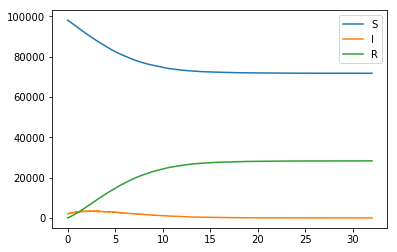

In [4]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt

N_over_2 = 50000
N = 2* N_over_2

deg_dist = [5,2]*(N_over_2)


G = nx.configuration_model(deg_dist)

t, S, I, R = EoN.fast_SIR(G, 0.5, 1, rho = 0.02)
#transmission rate of 0.5
#recovery rate of 1
#randomly infect 2% of the population to start.

plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R, label = 'R')
plt.legend()
plt.show()

### Epidemics versus non-Epidemic Outbreaks

In the discrete simulation, you may have observed two very distinct behaviors.  Either the disease spread and infected most of the population, or almost nothing happened.

We divide the behavior into two classes:

- **Epidemic outbreaks**: When an epidemic happens, the disease spreads until it is limited by the fact that the population size is finite.

- **Non-Epidemic outbreaks** When a non-epidemic outbreak happens, the disease dies out because it happened to not transmit much early on.  The fact that the population size is finite did not play a role in this.

If I just say "outbreak", I'm referring to a non-epidemic outbreak.

Let's see what this looks like.  We'll use an Erdős–Rényi network since they can be generated quickly.

0  of  10000
1000  of  10000
2000  of  10000
3000  of  10000
4000  of  10000
5000  of  10000
6000  of  10000
7000  of  10000
8000  of  10000
9000  of  10000


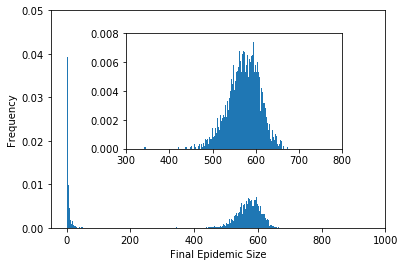

In [49]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib                          #these last 2 imports are
from distutils.version import LooseVersion #used to check 
                                           #matplotlib version

plt.clf()

N=1000
G = nx.fast_gnp_random_graph(N, 3./N)
p = 0.5
iterations = 10000

sizes = []
for counter in range(iterations):
    if counter%1000 == 0:
        print(counter, " of ", iterations)
    t, S, I, R = EoN.basic_discrete_SIR(G, p)
    sizes.append(R[-1])    #the '-1' grabs the last entry of R.


fig = plt.figure(1)
main = plt.axes()

#In older versions of matplotlib the `density` argument doesn't exist
#and `normed` should be used.  In newer versions `normed` has been 
#deprecated.  My laptop has the old version, and updating it is oddly 
#difficult.  So the bit below runs different code depending on the 
#version.

if LooseVersion(matplotlib.__version__) >=  LooseVersion("2.1"):  
    main.hist(sizes, bins = range(N+1), density = True) 
else:
    main.hist(sizes, bins = range(N+1), normed = 1) 
main.axis(xmax=1000, ymax = 0.05)

plt.xlabel('Final Epidemic Size')
plt.ylabel('Frequency')

inset = plt.axes([0.3,0.4,0.5,0.4])
if LooseVersion(matplotlib.__version__) >=  LooseVersion("2.1"):  
    inset.hist(sizes,bins = range(N+1), density=True)
else:
    inset.hist(sizes, bins = range(N+1), normed=1)
    
inset.axis(xmin = 300, xmax = 800, ymin=0, ymax = 0.008)

plt.show()